# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |Camila Daniela Zapata Castañeda   |
| **Fecha**      |28 de Enero del 2025   |
| **Expediente** |745624   |

## Regresión polinomial

Observa la siguiente gráfica.

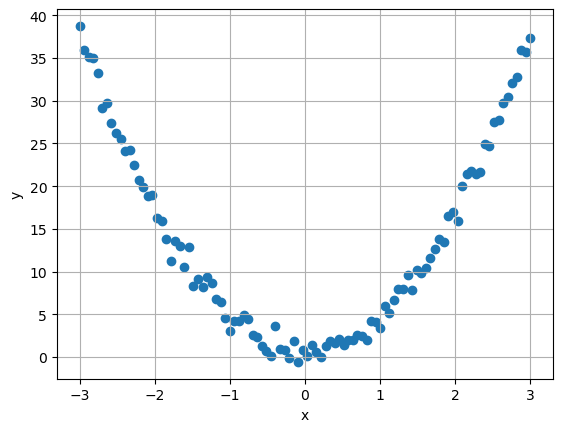

In [3]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [4]:
from sklearn.linear_model import LinearRegression

x_column = np.reshape(x, [len(x), 1])
y_column = np.reshape(y, [len(y), 1])

linreg = LinearRegression()

linreg.fit(x_column, y_column)

LinearRegression()

In [5]:
intercept = linreg.intercept_[0]
coef = linreg.coef_[0][0]
print(intercept, coef)

13.30223225795873 -0.0495544774359065


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

In [6]:
r2 = linreg.score
r2

<bound method RegressorMixin.score of LinearRegression()>

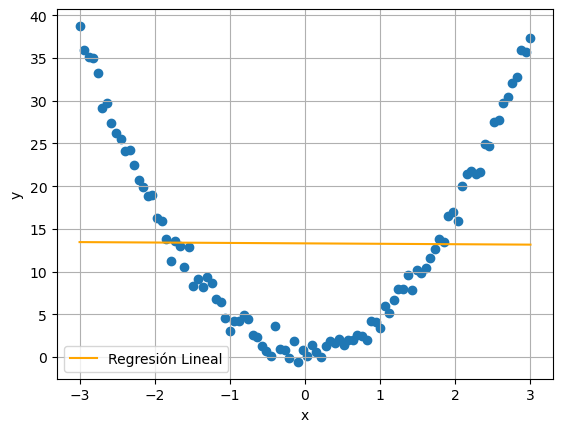

In [7]:
y_pred4 = intercept + coef*x_column
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred4, label="Regresión Lineal", color = 'orange');
plt.legend(loc="best")
plt.show()

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [8]:
def regression(x, y, degree):

    X = x.copy()
    for i in range (2, degree+1):
        X = np.hstack((X, x**i))

    model = LinearRegression()
    model = model.fit(X, y)

    intercept = model.intercept_
    coef = model.coef_

    r2 = model.score(X,y)

    y_pred = model.predict(X)
    print("r2 = ",r2)
    print('Intercepto: ', intercept[0])
    print('Coeficiente: ', coef[0])
    
    #gráfica
    plt.figure()
    plt.scatter(x, y)
    plt.scatter(x, y_pred, color = 'purple', label="predicción")
    plt.grid()
    plt.legend(loc="best")

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

r2 =  0.9934118040713642
Intercepto:  0.6194209631804846
Coeficiente:  [-0.04955448  4.14388884]


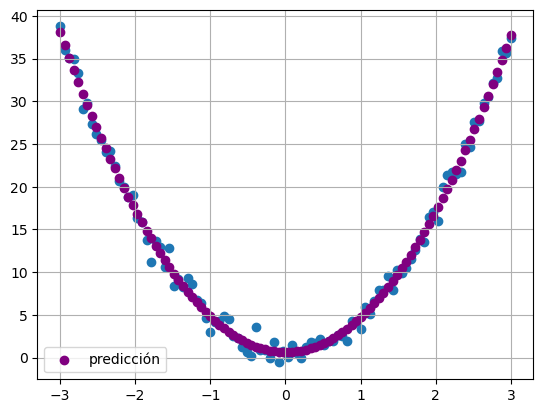

In [9]:
regression(x_column, y_column, 2)

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$ y su gráfica para cada curva

r2 =  0.9934129585186598
Intercepto:  0.6194209631804863
Coeficiente:  [-6.55753967e-02  4.14388884e+00  2.90847549e-03]


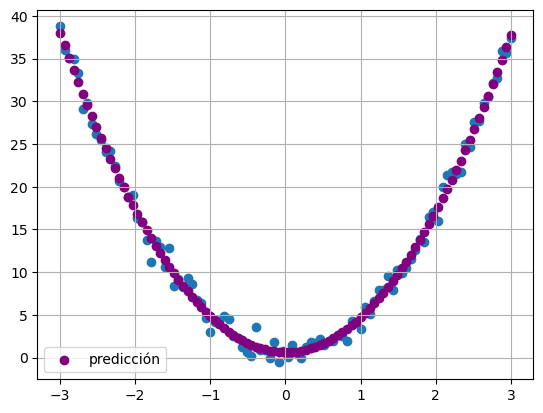

In [10]:
regression(x_column, y_column, 3)

r2 =  0.9934954953676421
Intercepto:  0.6337116478282674
Coeficiente:  [-2.76393644e-01  4.12831746e+00  1.10135698e-01  1.97920171e-03
 -1.05167018e-02]


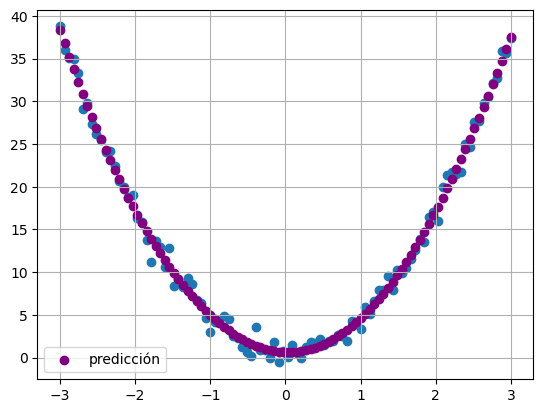

In [11]:
regression(x_column, y_column, 5)

r2 =  0.9935089341876935
Intercepto:  0.6101810919961768
Coeficiente:  [-1.75155617e-01  4.18219958e+00  1.07431886e-02 -1.56446593e-02
  1.33331414e-02  1.40889740e-03 -1.61012799e-03]


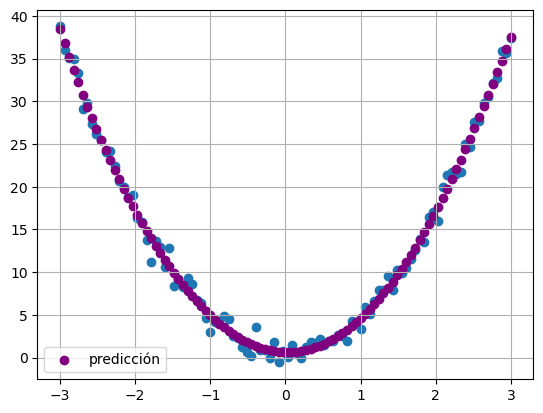

In [12]:
regression(x_column, y_column, 7)

r2 =  0.9935141799662259
Intercepto:  0.5890185996495045
Coeficiente:  [-1.10778098e-01  4.26535653e+00 -9.23732104e-02 -6.55597796e-02
  5.72464222e-02  1.08500851e-02 -8.45937252e-03 -5.51840642e-04
  3.53081565e-04]


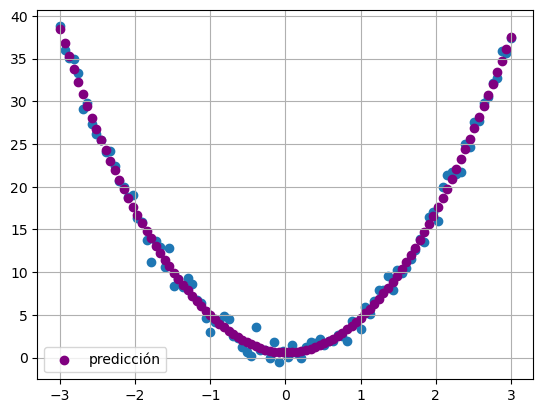

In [13]:
regression(x_column, y_column, 9)

r2 =  0.9935338704150221
Intercepto:  0.5670839644955787
Coeficiente:  [ 9.00703987e-02  4.39720527e+00 -5.68294874e-01 -1.90428125e-01
  3.69496567e-01  5.17798355e-02 -9.13700221e-02 -5.98142327e-03
  9.92036867e-03  2.50411792e-04 -3.99285153e-04]


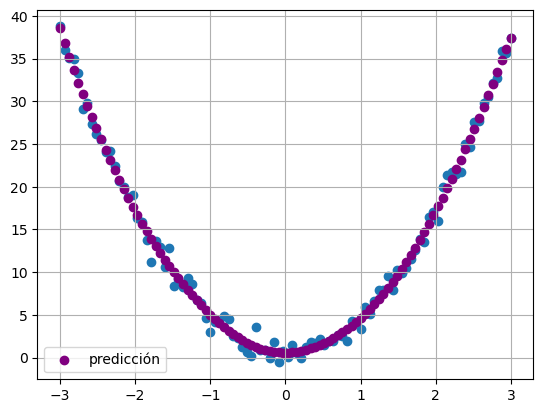

In [14]:
regression(x_column, y_column, 11)

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

Si no guiamos por el R2 sería el de grado 11 ya que es el que lo tiene mas cercano al 1, sin embargo eso no significa que al resto de los datos que no vemos se le ajuste igual de bien ya que esos tienden a dispararse hacia arriba o abajo por la cantidad de polinomios. 

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [15]:
def regression_array_prediction(x, y, degree, bound):
    x = np.reshape(x, [-1,1])
    y = np.reshape(y, [-1,1]) 
    
    X = x.copy()
    for i in range(2, degree+1):
        X = np.hstack((X, x**i))

    model = LinearRegression()
    model.fit(X, y)

    intercept = model.intercept_
    coef = model.coef_
    r2 = model.score(X, y)

    x_min = x.min()
    x_max = x.max()
    x_extended = np.linspace(x_min - bound, 
                             x_max + bound, 
                             100).reshape(-1,1)
    
    X_extended = x_extended.copy()
    for i in range(2, degree+1):
        X_extended = np.hstack((X_extended, x_extended**i))
    
    y_pred_extended = model.predict(X_extended)

    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.scatter(x, y, color='black', label="Datos Originales")
    plt.plot(x_extended, y_pred_extended, color='blue', label='Predicción Extendida')
    plt.legend(loc="best")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Regresión Polinomial de Grado {degree}')
    plt.show()

    print('Intercepto:', intercept[0])
    print('Coeficiente(s):', coef[0])
    print('R2:', r2)

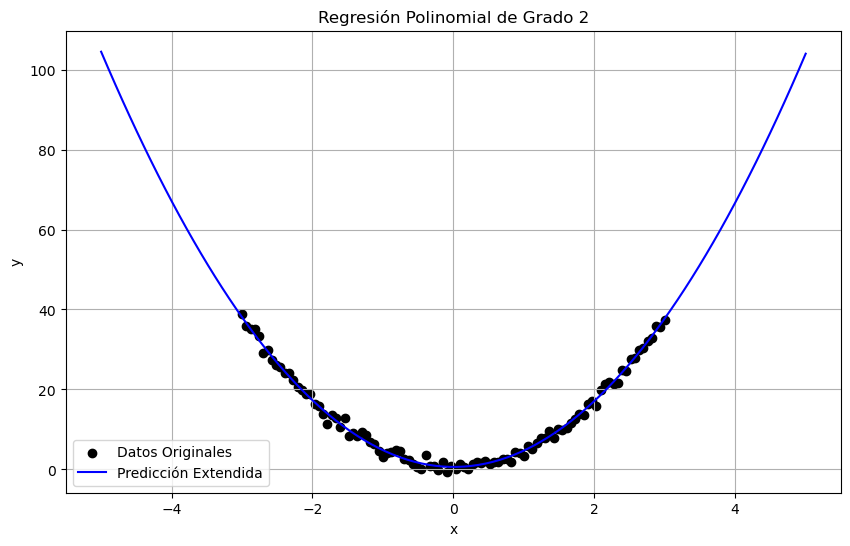

Intercepto: 0.6194209631804846
Coeficiente(s): [-0.04955448  4.14388884]
R2: 0.9934118040713642


In [16]:
regression_array_prediction(x_column, y_column, 2, 2)

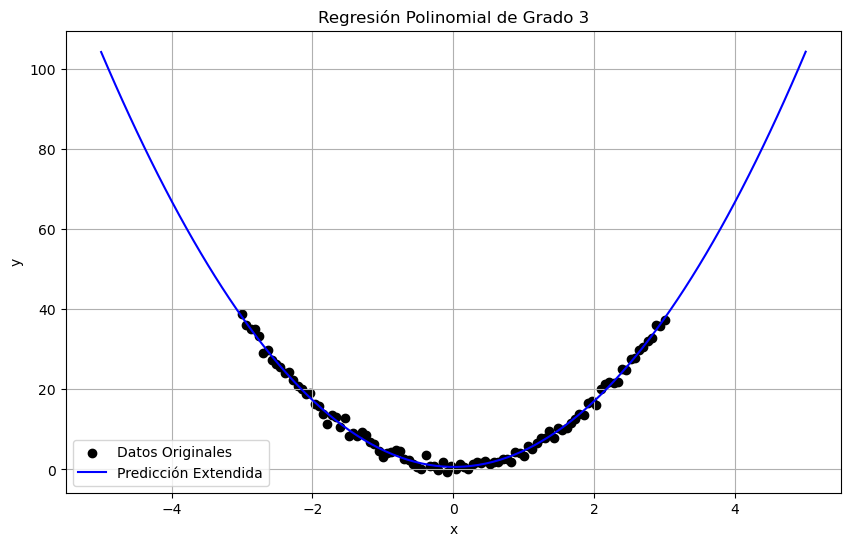

Intercepto: 0.6194209631804863
Coeficiente(s): [-6.55753967e-02  4.14388884e+00  2.90847549e-03]
R2: 0.9934129585186598


In [17]:
regression_array_prediction(x_column, y_column, 3, 2)

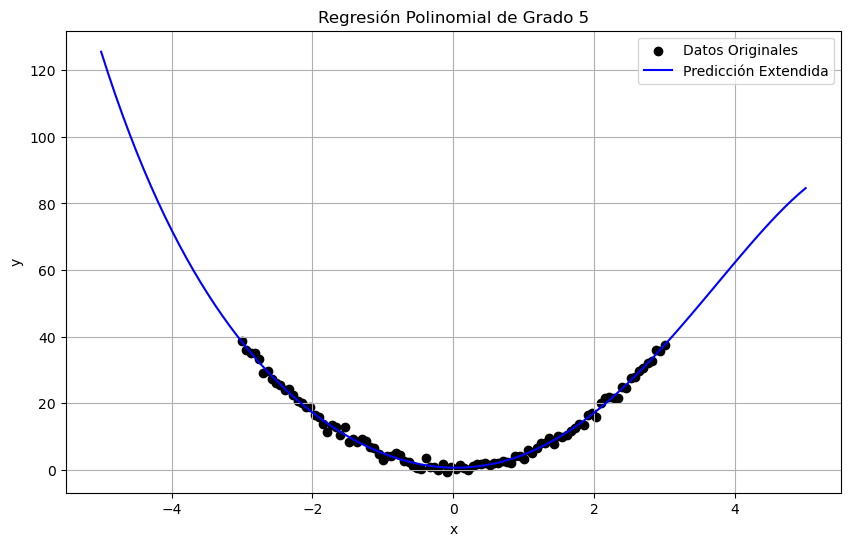

Intercepto: 0.6337116478282674
Coeficiente(s): [-2.76393644e-01  4.12831746e+00  1.10135698e-01  1.97920171e-03
 -1.05167018e-02]
R2: 0.9934954953676421


In [18]:
regression_array_prediction(x_column, y_column, 5, 2)

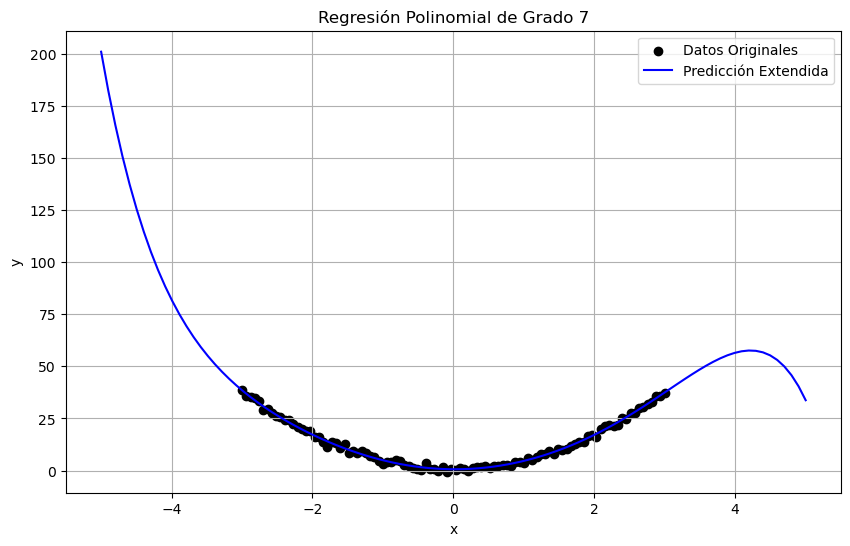

Intercepto: 0.6101810919961768
Coeficiente(s): [-1.75155617e-01  4.18219958e+00  1.07431886e-02 -1.56446593e-02
  1.33331414e-02  1.40889740e-03 -1.61012799e-03]
R2: 0.9935089341876935


In [19]:
regression_array_prediction(x_column, y_column, 7, 2)

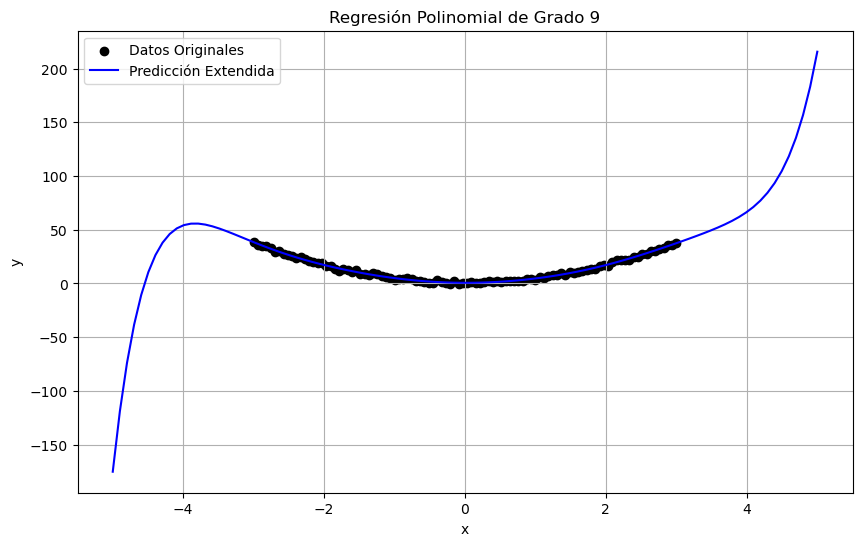

Intercepto: 0.5890185996495045
Coeficiente(s): [-1.10778098e-01  4.26535653e+00 -9.23732104e-02 -6.55597796e-02
  5.72464222e-02  1.08500851e-02 -8.45937252e-03 -5.51840642e-04
  3.53081565e-04]
R2: 0.9935141799662259


In [20]:
regression_array_prediction(x_column, y_column, 9, 2)

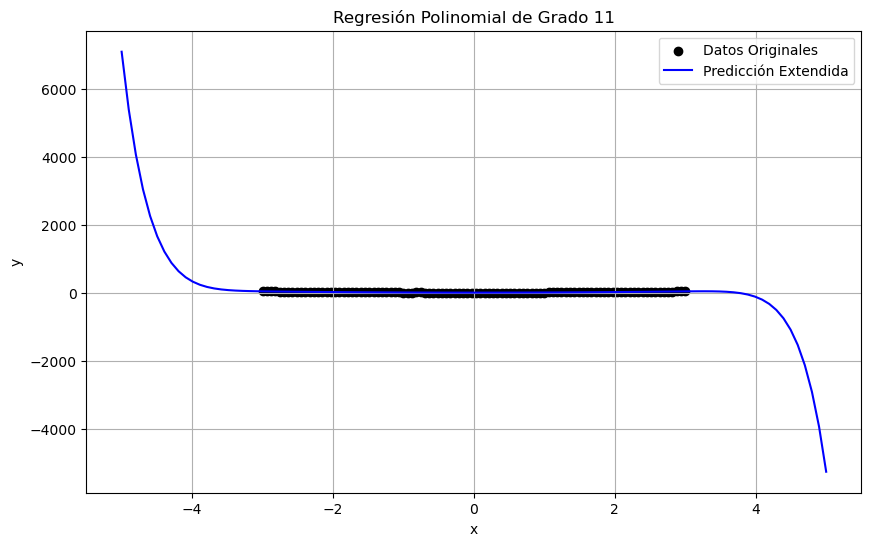

Intercepto: 0.5670839644955787
Coeficiente(s): [ 9.00703987e-02  4.39720527e+00 -5.68294874e-01 -1.90428125e-01
  3.69496567e-01  5.17798355e-02 -9.13700221e-02 -5.98142327e-03
  9.92036867e-03  2.50411792e-04 -3.99285153e-04]
R2: 0.9935338704150221


In [21]:
regression_array_prediction(x_column, y_column, 11, 2)

¿Cuál modelo crees que sea mejor?

Diría que el 2 sería el mejor, por un lado el modelo de grado dos es el mas simple y el que mejor se ajusta a los datos sin sobre ajustarse a estos mismos. Aparte de el r2 esta bastante cerca del 1 dandonos a entender que el modelo explica bastante bien la varianza de los datos. 

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3